### Task 04. Create a notebook that loads a data file, operates and adds to a recipe. 
### Check the new available datasources and make sure a relative path is used.
### Finally upload files to github. 

In [1]:
from __future__ import print_function; from PYME.recipes import modules; from PYME.LMVis import pipeline;
data = pipeline.Pipeline("../../data/16_1_series_BB_microtubules_STORM.h5r")
data.recipe.update_from_yaml('drift_correction_recipe_1601BB.yaml')
print("Available data sources: %s " % ', '.join(data.dataSources.keys()))
data.selectDataSource('drift_corrected')

Trying to load 3rd party recipe module PYMEcs.recipes.processing
Loaded 3rd party recipe module PYMEcs.recipes.processing
Trying to load 3rd party recipe module PYMEnf.recipes.pymenf
Loaded 3rd party recipe module PYMEnf.recipes.pymenf
Trying to load 3rd party recipe module PYMEcs.recipes.output
Loaded 3rd party recipe module PYMEcs.recipes.output
Trying to load 3rd party recipe module PYMEcs.recipes.localisations
Loaded 3rd party recipe module PYMEcs.recipes.localisations
Trying to load 3rd party recipe module PYMEcs.recipes.base
Loaded 3rd party recipe module PYMEcs.recipes.base


c:\users\work\documents\pyme_home\python-microscopy\PYME\IO\tabular.py:681: RuntimeWarning: invalid value encountered in greater
  self.Index *= (self.resultsSource[k] > range[0])*(self.resultsSource[k] < range[1])
c:\users\work\documents\pyme_home\python-microscopy\PYME\IO\tabular.py:681: RuntimeWarning: invalid value encountered in less
  self.Index *= (self.resultsSource[k] > range[0])*(self.resultsSource[k] < range[1])
Exception occurred in traits notification handler for object: <PYMEnf.recipes.pymenf.DriftCorrectModel object at 0x000000000EB31948>, trait: presets, old value: , new value: Piecewise Linear
Traceback (most recent call last):
  File "C:\Users\Work\Miniconda2\envs\pyme-default-plain\lib\site-packages\traits\trait_notifiers.py", line 591, in _dispatch_change_event
    self.dispatch(handler, *args)
  File "C:\Users\Work\Miniconda2\envs\pyme-default-plain\lib\site-packages\traits\trait_notifiers.py", line 553, in dispatch
    handler(*args)
  File "c:\users\work\document

Drift fitting using qHull triangularisation
('parameters:', ['b', 'a1', 'a0', 'a3', 'a2', 'a4', 'c'])
('parameters:', ['b4', 'a1', 'a0', 'a3', 'a2', 'b0', 'a4', 'b2', 'b3', 'b1', 'c'])
Exception occurred in traits notification handler.
Please check the log file for details.
Available data sources: filtered_localizations, colour_mapped, drift_corrected, Localizations 


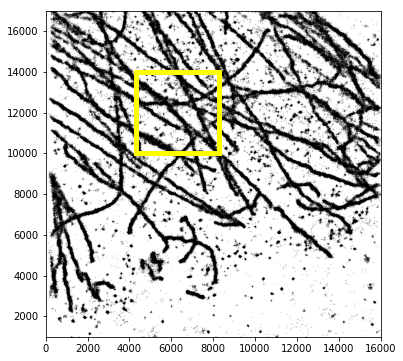

In [2]:
plt.figure(figsize = (6,6))
plt.scatter(data.x, data.y, s = 0.1, color = "black", alpha = 0.2)
rect = patches.Rectangle((4300,10000),4000, 4000, linewidth = 5, edgecolor = 'yellow', facecolor = 'none')
plt.gca().add_patch(rect)
plt.xlim(0,16000); plt.ylim(1000,17000);
plt.show()

In [3]:
from PYME.recipes import tablefilters
tf = tablefilters.FilterTable(
    inputName = 'drift_corrected',
    outputName = 'ROI',
    filters = {'x':[4300, 8300], 'y':[10000,14000]}
    )
data.recipe.add_module(tf)
data.recipe.execute()

Available data sources: filtered_localizations, ROI, colour_mapped, drift_corrected, Localizations 


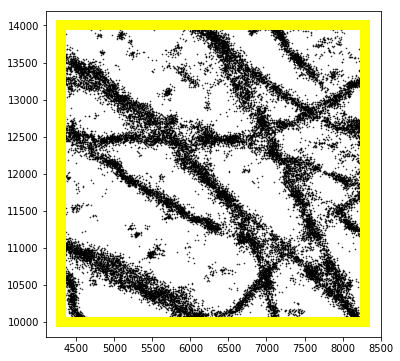

In [5]:
print("Available data sources: %s " % ', '.join(data.dataSources.keys()))
data.selectDataSource('ROI')

plt.figure(figsize = (6,6))
plt.scatter(data.x, data.y, s = 0.4, color = "black", alpha = 0.8)
rect = patches.Rectangle((4300,10000),4000, 4000, linewidth = 10, edgecolor = 'yellow', facecolor = 'none');plt.gca().add_patch(rect);
plt.show()